In [3]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
from seaborn import colors
import shap
import matplotlib.ticker as mticker
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [4]:
plt.style.use('default')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.size'] = 8
plt.rcParams['font.family'] = 'Times New Roman'
font = {'family': 'serif',
        'weight': "medium"
        }

In [5]:
cols = [2, 3, 4, 5, 6, 7]
cols_name = ['semantic similarity', 'fluency', 'toxicity', 'Shannon entropy', 'perplexity','semantic entropy']
df = pd.read_excel("../SHAP1/jfleg_data_all.xlsx", usecols=cols)

# 提取 'semantic_similarity' 列
semantic_similarity = df[['semantic similarity']]

# 对其他列进行标准化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.drop(columns=['semantic similarity']))
df_scaled = pd.DataFrame(scaled_data, columns=df.columns[:-1])  # 除去 'semantic_similarity' 后的列名

# 将 'semantic_similarity' 列合并回去
df_scaled = pd.concat([semantic_similarity.reset_index(drop=True), df_scaled], axis=1)

# 选择所需列
data = df_scaled[cols_name]
data.head()


,semantic similarity,fluency,toxicity,Shannon entropy,perplexity,semantic entropy
0,0.858357,0.598343,0.016714,0.723976,0.373239,0.665820
1,0.980495,0.342702,0.014098,0.758437,0.506295,0.510259
2,0.877560,0.348808,0.016663,0.858522,0.671426,0.705733
3,0.980103,0.346681,0.016714,0.773507,0.585065,0.539826
4,0.959664,0.346681,0.016714,0.778501,0.480598,0.548796


[17:24:23] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


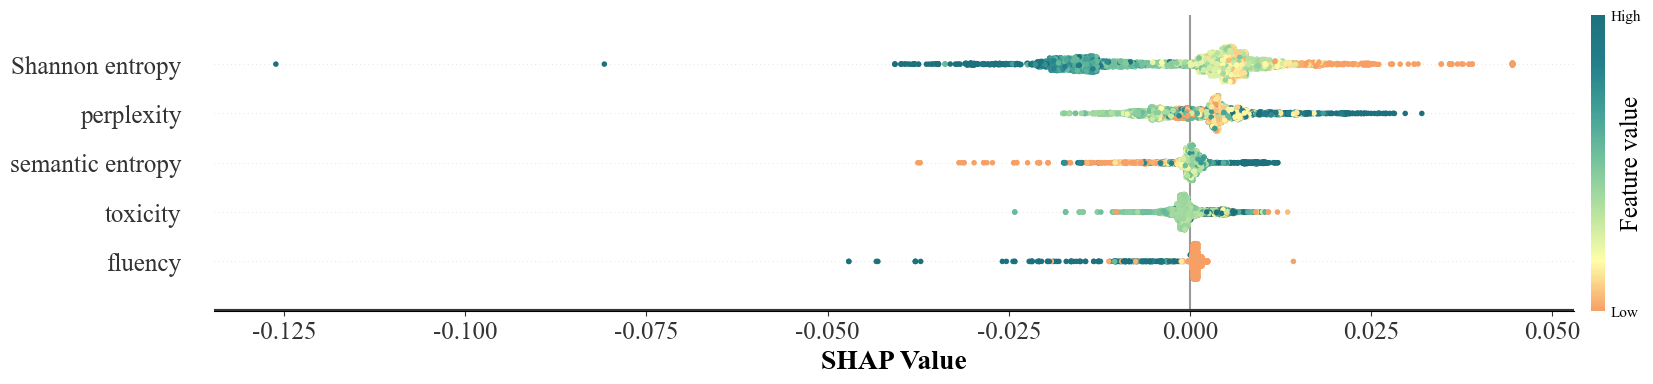

In [6]:
# 选择特征
cols = ['fluency', 'toxicity', 'Shannon entropy','perplexity', 'semantic entropy']

# 训练xgboost回归模型
model = xgb.XGBRegressor(max_depth=4, learning_rate=0.05, n_estimators=150)
model.fit(data[cols], data['semantic similarity'].values)

# 引用package并且获得解释器explainer
explainer = shap.Explainer(model)
# 获取训练集data各个样本各个特征的SHAP值
shap_values = explainer(data[cols])

# 可以确认基线值就是训练集的目标变量的拟合值的均值。
y_base = explainer.expected_value
# print(y_base)
data['pred'] = model.predict(data[cols])
# print(data['pred'].mean())

# summary_plot++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## 色系一
clist = ["#F7A065", "#fffea9", "#b7e3a0", "#78c49d", "#44a298","#237f8b","#1D717C"]
## 色系二
# clist = ['#053061', '#2166ac', '#4393c3', '#92c5de', '#d1e5f0', '#f7f7f7', '#fddbc7', '#f4a582', '#d6604d', '#b2182b', '#67001f']
## 色系三
#RdYlGn_r
newcmp = LinearSegmentedColormap.from_list('chaos', clist)

# 生成 SHAP summary_plot
plt.figure()
plt.rcParams.update({'font.family': 'Times New Roman'})
shap.summary_plot(shap_values, show=False, cmap=newcmp, use_log_scale=False, sort=True, alpha=1, plot_size=(18, 6*0.618))

# 修改 x 轴和 y 轴刻度标签的字体大小
plt.xticks(fontsize=18)   # 设置 x 轴刻度位置和字体大小
plt.yticks(fontsize=18)  # 设置 y 轴刻度标签的字体大小

# 修改x轴标签
plt.xlabel('SHAP Value', fontsize=20, fontdict={'weight': 'bold'})  # 修改x轴标签的内容和字体大小

# 获取当前轴对象
ax = plt.gca()
ax.axhline(y=-1, color='#363636', linewidth=3)

# 保存图片到本地，设置 dpi 为 300
plt.savefig('shap_summary_plot_1.jpg', dpi=300, bbox_inches='tight')

# 显示图像
plt.show()